# Examen final de Desarrollo de Aplicaciones para la Visualización de Datos

Nombre:

Apellidos:

Tiempo: 2 horas y 30 minutos

## Contexto del ejercicio

El Ayuntamiento de Madrid desea entender en más detalle la situación del problema habitacional en la ciudad de Madrid basada en múltiples fuentes de datos como alquiler vacacional, evolución del precio de alquiler, inflacción y densidad poblacional.

El objetivo del análisis es buscar patrones para entender mejor que está sucediendo, que barrios son los más estresados y que factores son que hacen que el precio de la vivienda esté en máximos. Por lo tanto, se pide:

1. Realizar un análisis descriptivo de los datos con al menos 6 visualizaciones diferentes. (3 Puntos)
2. Realizar un modelo de regresión lineal que explique (mostrar coeficientes) la dinámica del precio de la vivienda en base a los datos de alquiler vacacional a nivel agregado, no por barrio. (2 Puntos)
3. Montar un dashboard con 4 visualizaciones diferentes cómo mínimo. (2 Punto)
4. Concluir todo este análisis haciendo un informe con 2 páginas como mínimo que incluya, preguntas que se van a responder, dashboard resumen que sustente las preguntas y recomendaciones para mejorar la situación habitacional a partir de los resultados obtenidos de los análisis realizados con los datos. (3 Puntos)

## Juego de datos

Para realizar este análisis se provee un juego de datos con las siguientes variables:


| **Variable**           | **Descripción**                                                                                     | **Tipo**                 |
|-------------------------|-----------------------------------------------------------------------------------------------------|--------------------------|
| `neighbourhood_group`   | Grupo de vecindarios o distritos en Madrid.                                                        | Categórica               |
| `date`                 | Fecha de la observación en formato `YYYY-MM-DD`.                                                   | Temporal                 |
| `m2_price`             | Precio promedio por metro cuadrado en euros.                                                       | Cuantitativa continua     |
| `inflation`            | Inflación mensual como porcentaje (incremento en los precios al consumidor).                       | Cuantitativa continua     |
| `HICP`                 | Índice armonizado de precios al consumidor (indicador de inflación en la zona euro).               | Cuantitativa continua     |
| `population_density`   | Densidad de población anual por km² para toda la Comunidad de Madrid.                                                  | Cuantitativa continua     |
| `listings_count`       | Número total de propiedades listadas en Airbnb en un vecindario.                                   | Cuantitativa discreta     |
| `minimum_nights`       | Número mínimo de noches requerido para alquilar una propiedad.                                     | Cuantitativa discreta     |
| `nigth_price`          | Precio promedio por noche de las propiedades en Airbnb.                                            | Cuantitativa continua     |
| `availability_365`     | Número de días al año que una propiedad está disponible para alquilarse.                           | Cuantitativa discreta     |
| `listing_reviews`      | Número promedio de reseñas por propiedad listada.                                                 | Cuantitativa continua     |
| `number_of_reviews`    | Total acumulado de reseñas para todas las propiedades en un vecindario.                            | Cuantitativa discreta     |
| `reviews_per_month`    | Número promedio de reseñas recibidas por una propiedad al mes.                                     | Cuantitativa continua     |
| `hosts_count`          | Número de anfitriones activos en un vecindario.                                                   | Cuantitativa discreta     |
| `Private_room`         | Número de propiedades que ofrecen habitaciones privadas.                                           | Cuantitativa discreta     |
| `Entire_home`          | Número de propiedades que ofrecen viviendas completas.                                             | Cuantitativa discreta     |
| `Hotel_room`           | Número de propiedades categorizadas como habitaciones de hotel.                                    | Cuantitativa discreta     |
| `Shared_room`          | Número de propiedades que ofrecen habitaciones compartidas.                                        | Cuantitativa discreta     |


Ejemplos de preguntas que se pueden realizar a los datos:
1. ¿Cuál es el precio promedio del metro cuadrado (m2_price) por neighbourhood_group y cómo ha cambiado con el tiempo (date)?
2. ¿Existe una correlación entre el precio por metro cuadrado (m2_price) y la densidad de población (population_density)?
3. ¿Qué patrones estacionales se pueden identificar en las reseñas mensuales (reviews_per_month) o en la disponibilidad anual (availability_365)?
4. ¿Qué vecindarios tienen el mayor número de anfitriones (hosts_count) y cómo se relaciona con el precio de la vivienda?
5. ¿Qué vecindarios muestran el mayor crecimiento en precios (m2_price o nigth_price) entre años (year)?
6. ¿Qué factores (e.g., inflation, availability_365, population_density) explican mejor las variaciones en el precio por metro cuadrado (m2_price) o el precio por noche (nigth_price)?

Nota:
- Puedes hacer group_by para sacar variables agregadas por fecha.
- Se valorará la creatividad en las hipótesis, soluciones y limpieza del código y visualizaciones.

## Entrega del exámen

Compartir Url de github con:
- notebook que responde a las preguntas 1, 2 y 3
- PDF respondiendo a la pregunta 4

Puedes entregar el exámen en el siguiente enlace:

https://forms.gle/xe3En2raC3C3UUY39


# Librerías necesarias

In [ ]:
import plotly.express as px
import pandas as pd
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import pearsonr

# Análisis descriptivos


In [38]:
# Importar los datos
df = pd.read_csv('housing_time_series_by_madrid_neighbourhood.csv', header=0, sep=',')
df.head()

,neighbourhood_group,date,m2_price,inflation,HICP,population_density,listings_count,minimum_nights,nigth_price,availability_365,listing_reviews,number_of_reviews,reviews_per_month,hosts_count,Private_room,Entire_home,Hotel_room,Shared_room
0,Centro,2010-08-01,15.3,0.3,1.6,796,1,2.0,114.000000,305.00,1,155.0,0.9000,1,0,1,0,0
1,Centro,2011-01-01,15.6,-0.7,3.0,800,1,2.0,114.000000,305.00,1,155.0,0.9000,1,0,1,0,0
2,Centro,2011-02-01,15.4,0.1,3.4,800,4,7.0,184.000000,44.25,4,100.0,0.5925,3,0,4,0,0
3,Centro,2011-05-01,15.0,0.0,3.4,800,5,9.6,61.000000,134.60,11,264.4,1.6120,4,1,4,0,0
4,Centro,2011-06-01,15.0,-0.1,3.0,800,5,5.4,135.333333,129.20,15,289.8,1.7680,4,1,4,0,0


In [41]:
# Pregunta 1



# Crear gráfica interactiva con Plotly
fig = px.line(
    df, 
    x='date', 
    y='m2_price', 
    color='neighbourhood_group', 
    markers=True,
    title='Crecimiento Anual del Precio por m² por Neighbourhood Group',
    labels={
        'date': 'Fecha',
        'm2_price': 'Precio Promedio por m² (€)',
        'neighbourhood_group': 'Grupo de Vecindarios'
    }
)

# Mejorar diseño y disposición visual
fig.update_traces(marker=dict(size=4), line=dict(width=2))

fig.update_layout(
    legend_title=dict(font=dict(size=20)),
    legend=dict(orientation='v', x=1.05, y=1),
    margin=dict(l=40, r=40, t=40, b=40),
    xaxis=dict(title_font=dict(size=14), tickfont=dict(size=12)),
    yaxis=dict(title_font=dict(size=14), tickfont=dict(size=12)),
    title=dict(font=dict(size=18))
)

fig.show()



Aquí vemos que se están dividiendo en 3 grupos: 1) La almendra de Madrid, por así decirlo, con el barrio Salamca, Chamberí y el Centro. Luego la segunda capa de esta cebolla con barrios como Retiro, Tetuán, etc. y por último los barrios más perifericos de Madrid como Tetuan.

Esto lo que nos dice, es que claro estos barrios que luego en el siguiente gráfico vemos que cada vez tienen más densisdad de población no pueden crecer más y la úncia forma de hacer el filtro es con una mayor subida de precios.

In [85]:
# Pregunta 1

df_filtered = df.groupby('date').mean().reset_index()


# Crear gráfica interactiva con Plotly
fig = px.line(
    df_filtered, 
    x='date', 
    y='listings_count', 
    markers=True,
    title='Crecimiento del Número de listings por Fecha',
    labels={
        'date': 'Fecha',
        'hosts_count': 'Número de Anfitriones'
    }
)

# Mejorar diseño y disposición visual
fig.update_traces(marker=dict(size=4), line=dict(width=2))

fig.update_layout(
    legend_title=dict(font=dict(size=20)),
    legend=dict(orientation='v', x=1.05, y=1),
    margin=dict(l=40, r=40, t=40, b=40),
    xaxis=dict(title_font=dict(size=14), tickfont=dict(size=12)),
    yaxis=dict(title_font=dict(size=14), tickfont=dict(size=12)),
    title=dict(font=dict(size=18))
)

fig.show()



In [45]:


# Crear gráfico de dispersión con Plotly
fig = px.scatter(
    df,
    x='population_density',
    y='m2_price',
    trendline="ols",  # Agregar línea de regresión
    title=f'Relación entre densidad de población y precio por metro cuadrado agregado para todas las neighborhoods',
    labels={
        'population_density': 'Densidad poblacional (hab/km²)',
        'm2_price': 'Precio por metro cuadrado (€)',
    },
    opacity=0.7
)

# Mejorar diseño
fig.update_traces(selector=dict(mode='lines'), line=dict(color='red'))
fig.update_traces(marker=dict(size=8, color='blue'))
fig.update_layout(
    margin=dict(l=40, r=40, t=60, b=40),
    xaxis=dict(title_font=dict(size=14), tickfont=dict(size=12)),
    yaxis=dict(title_font=dict(size=14), tickfont=dict(size=12)),
    title=dict(font=dict(size=18))
)

fig.show()

# Calcular el coeficiente de correlación de Pearson
correlation, p_value = pearsonr(df['population_density'], df['m2_price'])

# Imprimir resultados de correlación
print(f"Coeficiente de correlación: {correlation:.2f}")
print(f"P-valor: {p_value:.5f}")

# Interpretación de la correlación
if p_value < 0.05:
    print("Existe una correlación estadísticamente significativa.")
    if abs(correlation) > 0.5:
        print("La correlación es moderada o fuerte.")
    else:
        print("La correlación es débil.")
else:
    print("No hay evidencia suficiente para concluir que existe una correlación significativa.")


Coeficiente de correlación: 0.47
P-valor: 0.00000
Existe una correlación estadísticamente significativa.
La correlación es débil.


Vemos como cuanto mayor en la densidad poblacional mayor es el precio de la viviendo lo cual es lógica hay más demanda para comprar casas, lo que tenemos que ver también es el número de oferta

In [75]:
import plotly.graph_objects as go
import pandas as pd

# Asegúrate de que la columna 'date' sea de tipo datetime
df['date'] = pd.to_datetime(df['date'])

# Agregar columnas para extraer el mes y el año
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# Agrupar por mes para calcular la media de reviews_per_month y availability_365
monthly_data = df.groupby('month').agg({
    'reviews_per_month': 'mean',
    'listings_count': 'mean',
     'nigth_price': 'mean',
}).reset_index()

# Crear la figura con dos leyendas separadas
fig = go.Figure()

# Línea para reviews_per_month
#fig.add_trace(go.Scatter(
#    x=monthly_data['month'],
#    y=monthly_data['reviews_per_month'],
#    mode='lines+markers',
#    name='Reseñas por Mes',
#    line=dict(color='blue'),
#    marker=dict(size=8)
#))

# Línea para availability_365
fig.add_trace(go.Scatter(
    x=monthly_data['month'],
    y=monthly_data['listings_count'],
    mode='lines+markers',
    name='Listing propeidades en Airbnb (Menor indica menor disponinilidad)',
    line=dict(color='black'),
    marker=dict(size=8),
    yaxis='y'  # Asignar al segundo eje Y
))

fig.add_trace(go.Scatter(
    x=monthly_data['month'],
    y=monthly_data['nigth_price'],
    mode='lines+markers',
    name='Precio medio de las viviendas listadas en Airbnb',
    line=dict(color='blue'),
    marker=dict(size=8),
    yaxis='y2'  # Asignar al segundo eje Y
))

# Configurar el diseño del gráfico
fig.update_layout(
    title='Patrones Estacionales: Reseñas Mensuales y Disponibilidad en Airbnb',
    xaxis=dict(
        title='Mes',
        tickmode='array',
        tickvals=list(range(1, 13)),
        ticktext=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                  'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
    ),
    yaxis=dict(
        title='Listing propeidades en Airbnb (Menor indica menor disponibilidad)',
        titlefont=dict(color='black'),
        tickfont=dict(color='black'),
    ),
    yaxis2=dict(
        title='Precio medio de las viviendas listadas en Airbnb',
        titlefont=dict(color='blue'),
        tickfont=dict(color='blue'),
        overlaying='y',  # Superponer el segundo eje Y al primero
        side='right'     # Mostrar el segundo eje Y en la derecha
    ),

    legend=dict(
        x=0.01,
        y=0.99,
        bgcolor='rgba(255,255,255,0)',
        bordercolor='rgba(0,0,0,0)'
    ),
    template='plotly_white',
    margin=dict(l=40, r=40, t=60, b=40)
)

# Mostrar el gráfico
fig.show()


Aqui estamos viuendo los patrones estacionales de viviendas alquiladas por mes y número de reseñas, en dodne que vemos que tanto el mes de agosto como el de febrebro es donde más gente vienen a Madrid

In [34]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

df['date'] = pd.to_datetime(df['date'])

# Agrupar los datos por neighbourhood_group
grouped = df.groupby('neighbourhood_group').agg({
    'hosts_count': 'mean',
    'm2_price': 'mean'
}).reset_index()

# Crear el gráfico de burbujas
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=grouped['hosts_count'],
    y=grouped['m2_price'],
    mode='markers',
    marker=dict(
        size=grouped['hosts_count'],
        sizemode='area',
        sizeref=2.*max(grouped['hosts_count'])/(100.**2),
        sizemin=10,
        color=grouped['m2_price'],
        colorscale='Viridis',
        colorbar=dict(title='Precio por m² (€)'),
        showscale=True
    ),
    text=grouped['neighbourhood_group'],
    hovertemplate=
        '<b>%{text}</b><br>' +
        'Anfitriones: %{x}<br>' +
        'Precio por m²: %{y}€<br>' +
        '<extra></extra>',
    name='Neighbourhood Groups'
))

# Configurar el diseño del gráfico
fig.update_layout(
    title='Número de Anfitriones vs Precio por m² por Neighbourhood Group',
    xaxis_title='Número de Anfitriones',
    yaxis_title='Precio por m² (€)',
    template='plotly_white',
    hovermode='closest'
)

fig.show()


En este caso vemps que  cuanto mayor sea el número de anfitriones mayor es el precio de la vivienda

In [35]:
# Crear columna 'year' a partir de la columna 'date'
df['year'] = pd.to_datetime(df['date']).dt.year

# Agrupar por vecindario y año, calculando el precio promedio por metro cuadrado
grouped_df = df.groupby(['neighbourhood_group', 'year'])['m2_price'].mean().reset_index()

# Calcular el porcentaje de crecimiento año a año para cada vecindario
grouped_df['growth_rate'] = grouped_df.groupby('neighbourhood_group')['m2_price'].pct_change() * 100

# Filtrar datos para evitar valores nulos en el crecimiento
growth_df = grouped_df.dropna(subset=['growth_rate'])

# Crear gráfica con el porcentaje de crecimiento
fig = px.bar(
    growth_df,
    x='year',
    y='growth_rate',
    color='neighbourhood_group',
    barmode='group',
    title='Porcentaje de Crecimiento Anual del Precio por m² por Vecindario',
    labels={
        'year': 'Año',
        'growth_rate': 'Porcentaje de Crecimiento (%)',
        'neighbourhood_group': 'Vecindarios'
    }
)

# Mejorar diseño
fig.update_layout(
    legend_title=dict(font=dict(size=12)),
    xaxis=dict(title_font=dict(size=14), tickfont=dict(size=12)),
    yaxis=dict(title_font=dict(size=14), tickfont=dict(size=12)),
    title=dict(font=dict(size=18)),
    margin=dict(l=40, r=40, t=40, b=40)
)

fig.show()

# Linear Regression

In [ ]:
def dividir_datos(datos, variable_objetivo, test_size=0.2):
    """Divide los datos en conjuntos de entrenamiento y prueba."""
    from sklearn.model_selection import train_test_split
    X = datos.drop(variable_objetivo, axis=1)
    y = datos[variable_objetivo]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size)
    return X_train, X_test, y_train, y_test


def calcular_metricas_regresion(y_real, y_predicho):
    """Calcula métricas de evaluación para modelos de regresión."""
    from sklearn.metrics import (
        r2_score,
        mean_absolute_error,
        mean_squared_error
    )
    print("Mean Absolute Error:", mean_absolute_error(y_real, y_predicho))
    print("Mean Squared Error:", mean_squared_error(y_real, y_predicho))
    print("R2 Score:", r2_score(y_real, y_predicho))


X_train, X_test, y_train, y_test = dividir_datos(df.groupby('date').sum(), 'm2_price')

# Modelos de regresión
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

modelos_regresion = {
    'Regresión Lineal': LinearRegression(),
}

for nombre, modelo in modelos_regresion.items():
    reg = modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    print(f"Resultados del modelo: {nombre}")
    calcular_metricas_regresion(y_test, y_pred)
    print('-'*50)

Resultados del modelo: Regresión Lineal
Mean Absolute Error: 3.3425544639326854
Mean Squared Error: 16.73553108049836
R2 Score: 0.9973130406913051
--------------------------------------------------


In [24]:
import plotly.express as px
import pandas as pd

# Asumir que `reg.coef_` contiene los coeficientes y `df.columns` las características
# Crear un DataFrame con características y coeficientes
coef_data = pd.DataFrame({
    'Característica': df.groupby('date').sum().drop('m2_price', axis=1).columns,
    'Coeficiente': reg.coef_
})

# Crear un gráfico de barras horizontales con Plotly Express
fig = px.bar(
    coef_data,
    x='Coeficiente',
    y='Característica',
    orientation='h',
    title='Importancia de las variables en la Regresión Lineal',
    labels={
        'Coeficiente': 'Coeficientes',
        'Característica': 'Características'
    }
)

# Mejorar diseño
fig.update_layout(
    xaxis=dict(title_font=dict(size=14), tickfont=dict(size=12)),
    yaxis=dict(title_font=dict(size=14), tickfont=dict(size=12)),
    title=dict(font=dict(size=18)),
    margin=dict(l=40, r=40, t=40, b=40)
)

fig.show()


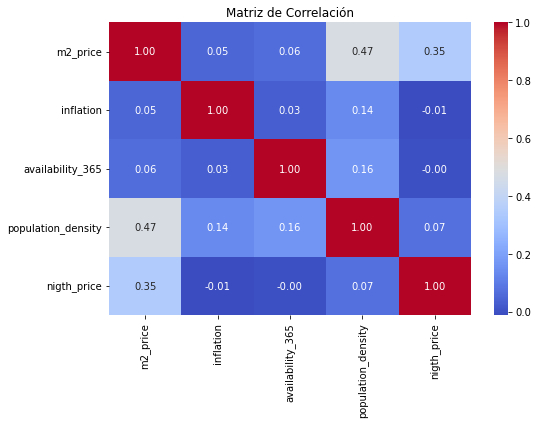

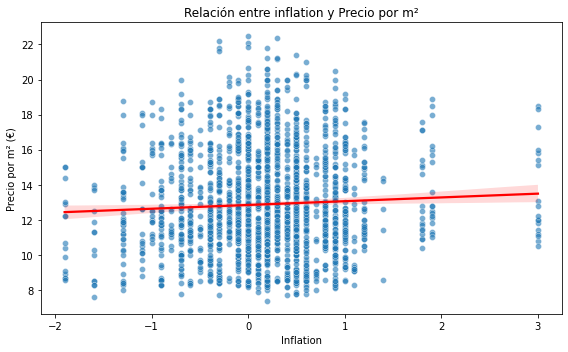

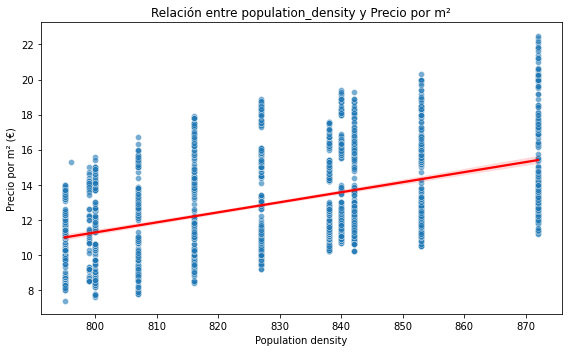

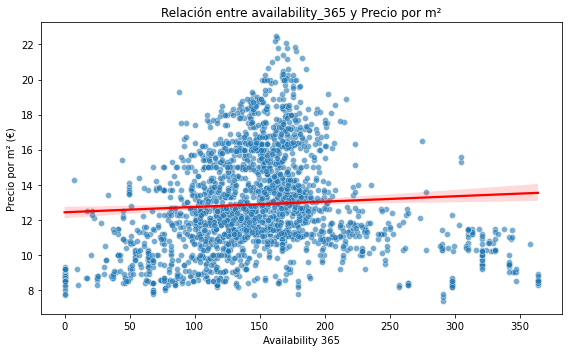

In [86]:
# Seleccionar las variables relevantes
variables = ['m2_price', 'inflation', 'availability_365', 'population_density', 'nigth_price']

# Calcular la matriz de correlación
corr_matrix = df[variables].corr()

# Mostrar la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

# Gráficos de dispersión para los factores más correlacionados
factors = ['inflation', 'population_density', 'availability_365']

for factor in factors:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=factor, y='m2_price', alpha=0.6)
    sns.regplot(data=df, x=factor, y='m2_price', scatter=False, color='red')
    plt.title(f'Relación entre {factor} y Precio por m²')
    plt.xlabel(factor.replace('_', ' ').capitalize())
    plt.ylabel('Precio por m² (€)')
    plt.tight_layout()
    plt.show()


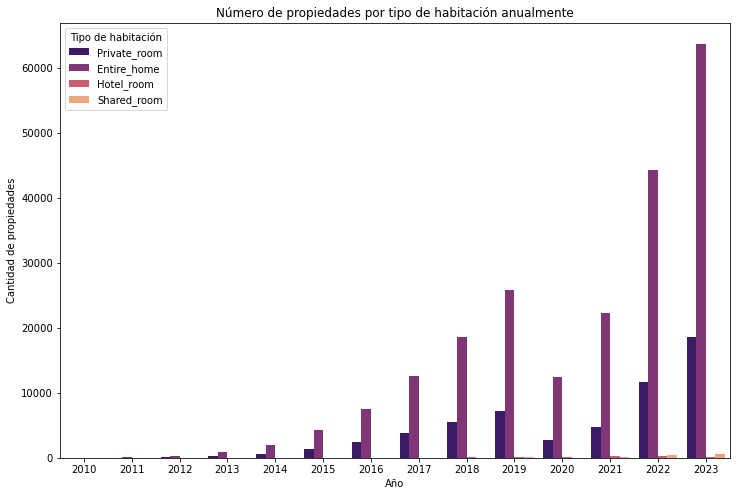

In [ ]:
room_types = df[['Private_room', 'Entire_home', 'Hotel_room', 'Shared_room']].sum().reset_index()
room_types.columns = ['Room Type', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(data=room_types, x='Room Type', y='Count', palette='magma')
plt.title('Número de propiedades por tipo de habitación')
plt.xlabel('Tipo de habitación')
plt.ylabel('Cantidad de propiedades')
plt.show()



In [113]:
df['year'] = pd.DatetimeIndex(df['date']).year
price_per_night_annual = df.groupby('year')['nigth_price'].mean().reset_index()

# Crear gráfica interactiva con Plotly
fig = px.line(
    price_per_night_annual, 
    x='year', 
    y='nigth_price', 
    markers=True,
    title='Evolución del Precio por Noche a lo Largo de los Años',
    labels={
        'date': 'Fecha',
        'nigth_price': 'Precio por Noche (€)'
    }
)

# Mejorar diseño y disposición visual
fig.update_traces(marker=dict(size=4), line=dict(width=2))

fig.update_layout(
    legend_title=dict(font=dict(size=20)),
    legend=dict(orientation='v', x=1.05, y=1),
    margin=dict(l=40, r=40, t=40, b=40),
    xaxis=dict(title_font=dict(size=14), tickfont=dict(size=12)),
    yaxis=dict(title_font=dict(size=14), tickfont=dict(size=12)),
    title=dict(font=dict(size=18))
)

fig.show()

In [114]:
df['year'] = pd.DatetimeIndex(df['date']).year
price_per_night_annual = df.groupby('year')['availability_365'].mean().reset_index()
# Crear gráfica interactiva con Plotly
fig = px.line(
    price_per_night_annual, 
    x='year', 
    y='availability_365', 
    markers=True,
    title='Evolución de la Disponibilidad Anual a lo Largo de los Años',
    labels={
        'date': 'Fecha',
        'availability_365': 'Disponibilidad Anual (días)'
    }
)

# Mejorar diseño y disposición visual
fig.update_traces(marker=dict(size=4), line=dict(width=2))

fig.update_layout(
    legend_title=dict(font=dict(size=20)),
    legend=dict(orientation='v', x=1.05, y=1),
    margin=dict(l=40, r=40, t=40, b=40),
    xaxis=dict(title_font=dict(size=14), tickfont=dict(size=12)),
    yaxis=dict(title_font=dict(size=14), tickfont=dict(size=12)),
    title=dict(font=dict(size=18))
)

fig.show()